# Task 4: Binary Classification - Baseline Model (Logistic Regression)

This notebook loads the preprocessed data saved by `1_consolidate_data.ipynb` and trains/evaluates a baseline Logistic Regression model.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import utils # Import the new utils module


In [2]:
# Load the preprocessed data using the utility function
try:
    df = utils.load_preprocessed_data() # Default path 'data/preprocessed_data.parquet'
except Exception as e:
    print(f"Stopping notebook execution due to error in loading data: {e}")
    raise


Loading preprocessed data from data/preprocessed_data.parquet...
Data loaded successfully.
<class 'pandas.core.frame.DataFrame'>
Index: 4475 entries, 199 to 1861
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BIB       4475 non-null   float64
 1   FAN       4475 non-null   float64
 2   LUK       4475 non-null   float64
 3   NUS       4475 non-null   float64
 4   SIS       4475 non-null   float64
 5   UIN       4475 non-null   float64
 6   WET       4475 non-null   float64
 7   COD_rrr   4475 non-null   float64
 8   COD_uuu   4475 non-null   float64
 9   ERG_nnn   4475 non-null   float64
 10  ERG_www   4475 non-null   float64
 11  GJAH_iii  4475 non-null   float64
 12  GJAH_rrr  4475 non-null   float64
 13  MYR_eee   4475 non-null   float64
 14  MYR_fff   4475 non-null   float64
 15  MYR_ggg   4475 non-null   float64
 16  MYR_hh    4475 non-null   float64
 17  MYR_kkk   4475 non-null   float64
 18  MYR_lll   4475 non-n

In [3]:
# Separate train/test and features/target using utility function
X_train_scaled, y_train, X_test_scaled, y_test = utils.split_data_features_target(df)

# Convert target variables using utility function
y_train = utils.convert_target_variable(y_train)
y_test = utils.convert_target_variable(y_test)

# The old print statements for shapes are now handled within utils.split_data_features_target()


Training features shape: (3580, 37), Training target shape: (3580,)
Test features shape: (895, 37), Test target shape: (895,)

Converting target variable 'Class' to numeric (n=0, y=1)...
Target variable converted.
Value counts:
 Class
1    3308
0     272
Name: count, dtype: int64

Converting target variable 'Class' to numeric (n=0, y=1)...
Target variable converted.
Value counts:
 Class
1    827
0     68
Name: count, dtype: int64


# Evaluation Function

Define a reusable function to display evaluation metrics and plot the confusion matrix.

# Train and Evaluate Logistic Regression Model

Using the scaled and imputed data loaded from the parquet file.


Training Logistic Regression model...
Model training complete.

--- Logistic Regression Evaluation ---
Accuracy: 0.9542

Classification Report:
              precision    recall  f1-score   support

 Class n (0)       0.78      0.56      0.65        68
 Class y (1)       0.96      0.99      0.98       827

    accuracy                           0.95       895
   macro avg       0.87      0.77      0.81       895
weighted avg       0.95      0.95      0.95       895


Confusion Matrix:
[[ 38  30]
 [ 11 816]]


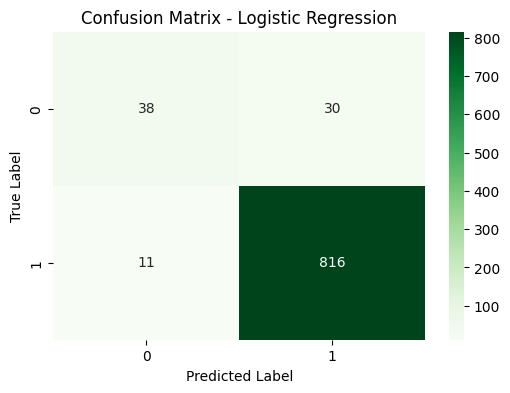


ROC AUC Score: 0.9263


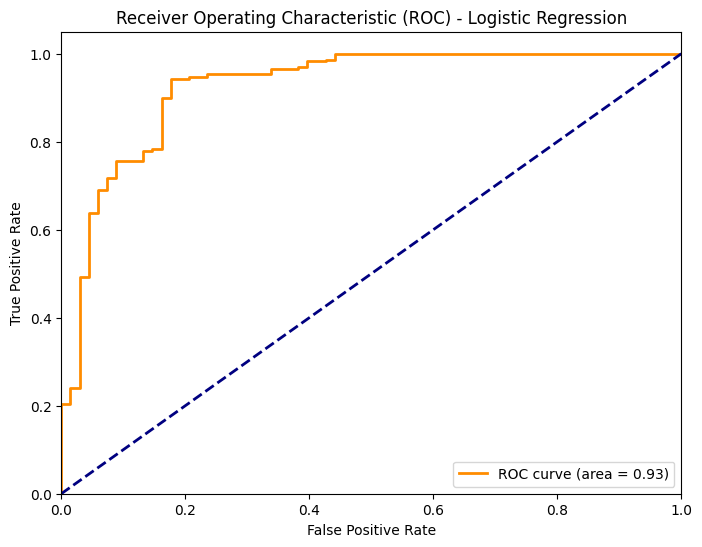

In [4]:
# Train and Evaluate Logistic Regression Model
# Using the scaled and imputed data.

# 1. Instantiate Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 2. Train Model
print("\nTraining Logistic Regression model...")
log_reg.fit(X_train_scaled, y_train)
print("Model training complete.")

# 3. Make Predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# 4. Evaluate Model using the utility function
# The utility function `evaluate_model_performance` also handles ROC/AUC
utils.evaluate_model_performance(y_test, y_pred_lr, X_test_scaled, log_reg, "Logistic Regression")
